In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"C:\Users\Suraj\Downloads\ML\titanic_DT\titanic.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

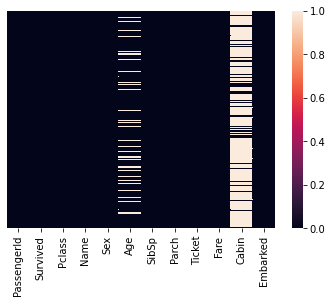

In [5]:
sns.heatmap(train.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

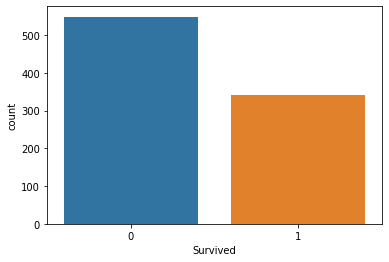

In [6]:
sns.countplot(x="Survived", data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

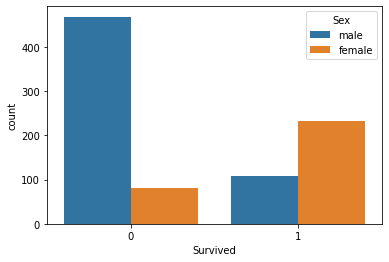

In [7]:
sns.countplot(x='Survived',data=train,hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

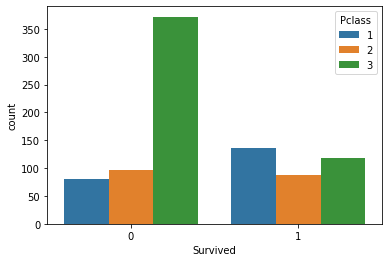

In [8]:
sns.countplot(x='Survived',data=train,hue='Pclass')

C:\Users\Suraj\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

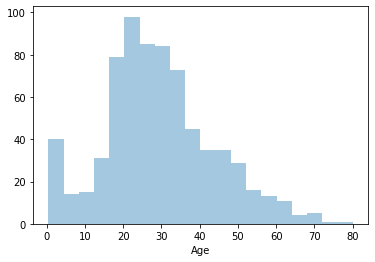

In [9]:
sns.distplot(train['Age'],kde=False)

<AxesSubplot:>

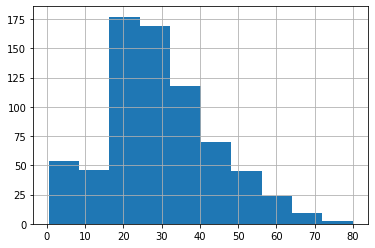

In [10]:
train.Age.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

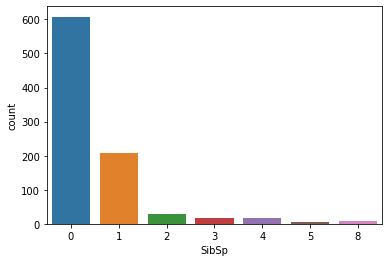

In [11]:
sns.countplot(x='SibSp',data=train)

C:\Users\Suraj\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

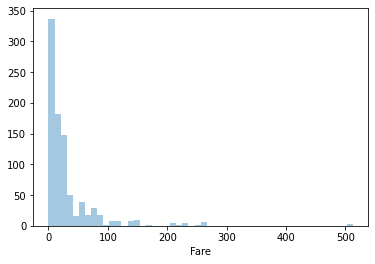

In [12]:
sns.distplot(train.Fare,kde=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

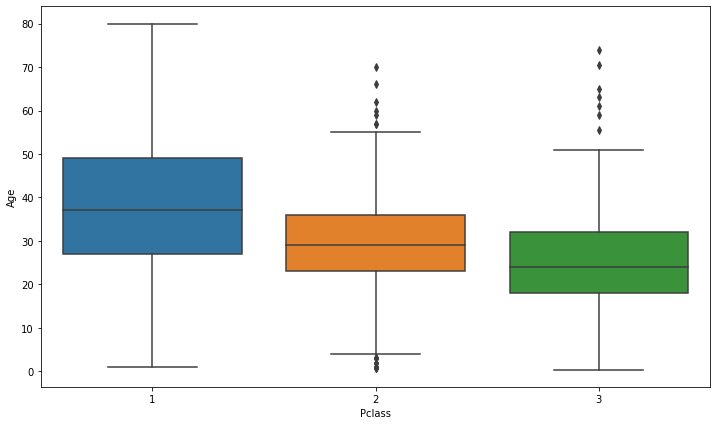

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age", data=train)

In [14]:
def impute_nan(col):
    Age=col[0]
    Pclass=col[1]
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [15]:
train['Age']=train[['Age',"Pclass"]].apply(impute_nan,axis=1)

<AxesSubplot:>

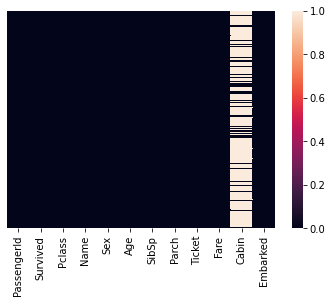

In [16]:
sns.heatmap(train.isnull(),yticklabels=False)

In [17]:
train.drop(columns=["PassengerId","Name","Ticket"], axis=1,inplace=True)
train.drop(columns=["Cabin"], axis=1,inplace=True)

In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embarked=pd.get_dummies(train.Embarked,drop_first=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [21]:
train.drop(columns=["Sex","Embarked"],inplace=True)


In [22]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [23]:
train=pd.concat([train,sex,embarked],axis=1)

#### train.head()

In [25]:
import pandas as pd
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [26]:
X_train,X_test,y_train,y_test=train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=(0.30),random_state=2)

In [27]:
clf=DecisionTreeClassifier()

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
clf.score(X_test,y_test)

0.7723880597014925

In [30]:

grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [31]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [32]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [33]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'random'}


In [34]:
grid_search.best_score_

0.8474838709677419

In [35]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, min_samples_leaf= 2, min_samples_split= 4, splitter ='best')
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       min_samples_split=4)

In [36]:
clf.score(X_test,y_test)

0.7985074626865671

In [45]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
707,1,42.0,0,0,26.2875,1,0,1
37,3,21.0,0,0,8.0500,1,0,1
615,2,24.0,1,2,65.0000,0,0,1
169,3,28.0,0,0,56.4958,1,0,1
68,3,17.0,4,2,7.9250,0,0,1


In [37]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Users\Suraj\Anaconda3\envs\titanic\Library\bin\graphviz'

In [38]:
feature_name=list(X_train.columns)
class_name = list(y_train.unique())

dot_data = export_graphviz(clf,rounded = True,filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("tree.png")


True

In [39]:

import pickle

with open('titanic.sav', 'wb') as f:
    pickle.dump(clf,f)

In [40]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 451 to 168
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  623 non-null    int64  
 1   Age     623 non-null    float64
 2   SibSp   623 non-null    int64  
 3   Parch   623 non-null    int64  
 4   Fare    623 non-null    float64
 5   male    623 non-null    uint8  
 6   Q       623 non-null    uint8  
 7   S       623 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB


In [41]:
import platform
platform.architecture()

('64bit', 'WindowsPE')

In [42]:
import platform, sys
platform.architecture(), sys.maxsize

(('64bit', 'WindowsPE'), 9223372036854775807)